In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

num_samples = 999  # Number of samples in the generated EMG signal
num_channels = 1  # Number of channels in the EMG signal
num_clusters = 3  # Number of clusters in the Gaussian Mixture Model
 
def generate_zero_mean_gmm(num_clusters, num_samples):
    # Generate covariance matrices for each cluster
    covariances = [np.eye(num_samples) for _ in range(num_clusters)]  # Identity matrix as covariance for each cluster

    # Generate weights for each cluster (uniform weights)
    weights = np.ones(num_clusters) / num_clusters

    # Generate GMM samples
    gmm_samples = np.concatenate([
        multivariate_normal.rvs(mean=np.zeros(num_samples), cov=covariances[i], size=int(num_samples * weights[i]))
        for i in range(num_clusters)
    ])

    return gmm_samples

gmm_samples = generate_zero_mean_gmm(num_clusters, num_samples)  # Generate GMM samples

rms_value = float(input('Enter the rms value (in N): ')) # Example: Generate random RMS values
hofms_value = float(input('Enter the hofms value (in N): ')) # Example: Generate random 2nd order HOFMs values



Enter the rms value (in N): 0.17
Enter the hofms value (in N): 0.07


In [ ]:
emg_signal = hofms_value * rms_value + gmm_samples  # Combine HOFMs, RMS, and GMM


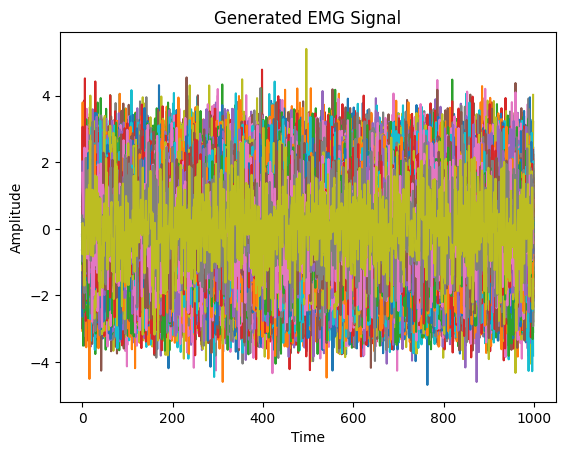

In [ ]:
time = np.arange(num_samples)
plt.plot(time, emg_signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Generated EMG Signal')
plt.show()
